# Lecture: REINFORCE for the CartPole environment

The CartPole environment from Gymnasium is a classic control problem where the goal is to balance a pole on a moving cart by applying forces to the cart. The agent receives observations such as the cart position, cart velocity, pole angle, and pole angular velocity, and must learn to keep the pole upright for as long as possible without it falling or the cart moving out of bounds.

<img src="images/cart_pole.gif" alt="CartPole balancing" width="400"/>

## Environment Overview

- **Goal:** Balance a pole on a moving cart by applying forces left or right.
- **Observation space:** 4 continuous values
  - Cart Position
  - Cart Velocity
  - Pole Angle
  - Pole Velocity at Tip
- **Action space:** Discrete with 2 actions
  - 0: Push cart to the left
  - 1: Push cart to the right
- **Episode termination:**
  - Pole angle is more than ±12°
  - Cart position goes beyond ±2.4 units
  - Episode length reaches 500 steps (solved if agent balances for 500 steps)

Run the following cell only if you are working with google colab to copy the required .py file in the root directory. If you are working locally just ignore this cell!

In [ ]:
!git clone https://github.com/Fjoelsak/RL.git
!cp RL/07_Policy_Search/ReinforceAgent.py ./
!mkdir images
!cp RL/06_Value_Function_Approximation/images/cart_pole.gif ./images
!mkdir logs
!mkdir logs/MCPG_run3
!cp RL/07_Policy_Search/logs/MCPG_run3/Episode_750_agent.keras ./logs/MCPG_run3/
!cp RL/07_Policy_Search/logs/MCPG_run3/results.csv ./logs/MCPG_run3/

### Get to know the environment

### Task 1

Instantiate the environment and check the state and action space wrt type and dimensions.

In [1]:
import gymnasium as gym

env = gym.make('CartPole-v1')

print(env.observation_space)
print(env.action_space)

Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Discrete(2)


### Task 2

Check the environment by sampling action from action space. How good is a random agent averaged over 100 episodes?

In [11]:
import numpy as np

env = gym.make('CartPole-v1')

n_eps = 100
reward_sum = []

for i in range(n_eps):
    obs, _ = env.reset()
    reward_per_episode = 0
    
    while True:
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)
        reward_per_episode += reward
        
        if terminated or truncated:
            reward_sum.append(reward_per_episode)
            break
            
        #env.render()
        
print("Mittelwert des Random Agenten: ", np.mean(reward_sum))
env.close()

Mittelwert des Random Agenten:  20.17


## Excercise: Solving the problem with a REINFORCE agent

### Task 3

Train the PG-Reinforce agent on the Cart-Pole env.

Therefore, you have to set up the model as a simple feed-forward neural net with 1 hidden lay with HIDDEN_DIM number of neurons.

- Implement the corresponding TODO in ```ReinforceAgent.py``` in the ```build_model()``` method.
- In addition, check where the Policy gradient update is implemented and comment the line where the loss is defined with the corresponding formula from the lecture slides.
- Try out your implementation and look at the impact of the config parameters on the training with the plot_trainingsinformation() method after finishing training (with current config it took at most 6minutes at my laptop)
- test your agent with the test method as in the last cell of this notebook

In [1]:
# Konfigurationen für den DQN-,DDQN und PER-Algorithmus.
config = {
    "EPISODES": 800,
    "MAX_TIMESTEPS": 500,
    "LEARNING_RATE": 0.003,
    "HIDDEN_DIM": 24,
    "DISCOUNT": 0.99,
    "LOGS": 'logs/MCPG_run3/'
}

In [11]:
import gymnasium as gym
from ReinforceAgent import ReinforceAgent

env = gym.make('CartPole-v1')

agent = ReinforceAgent(env, config)
agent.train(env)

Episode 0, Reward: 11.00
Episode:	 50 	 Average Score:	 23.86
Episode 50, Reward: 12.00
Episode:	 100 	 Average Score:	 32.71
Episode 100, Reward: 94.00
Episode:	 150 	 Average Score:	 57.09
Episode 150, Reward: 70.00
Episode:	 200 	 Average Score:	 93.53
Episode 200, Reward: 178.00
Episode:	 250 	 Average Score:	 133.26
Episode 250, Reward: 166.00
Episode:	 300 	 Average Score:	 200.27
Episode 300, Reward: 174.00
Episode:	 350 	 Average Score:	 263.12
Episode 350, Reward: 500.00
Episode:	 400 	 Average Score:	 329.51
Episode 400, Reward: 500.00
Episode:	 450 	 Average Score:	 421.15
Episode 450, Reward: 500.00
Episode:	 500 	 Average Score:	 450.11
Episode 500, Reward: 500.00
Episode:	 550 	 Average Score:	 468.85
Episode 550, Reward: 500.00
Episode:	 600 	 Average Score:	 491.36
Episode 600, Reward: 500.00
Episode:	 650 	 Average Score:	 489.85
Episode 650, Reward: 500.00
Episode:	 700 	 Average Score:	 497.76
Episode 700, Reward: 500.00
Episode:	 750 	 Average Score:	 499.83
Episode

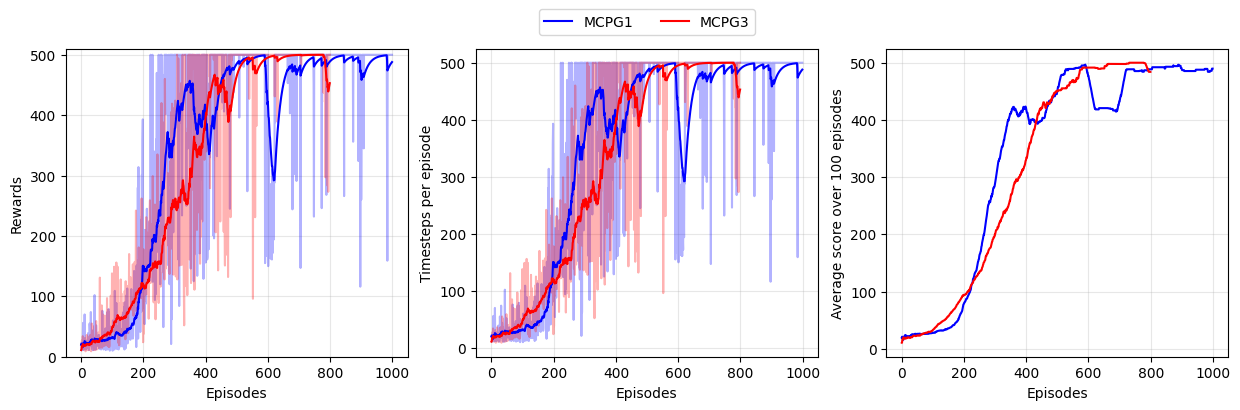

In [12]:
import pandas as pd
from ReinforceAgent import plot_trainingsinformation

data_MCPG_1 = pd.read_csv(r'logs/MCPG_run1/results.csv')
data_MCPG_3 = pd.read_csv(r'logs/MCPG_run3/results.csv')
plot_trainingsinformation([data_MCPG_1, data_MCPG_3], ['MCPG1', 'MCPG3'], ['blue','red'], ylim = 510,);

In [3]:
import gymnasium as gym
import ReinforceAgent as Agent

env = gym.make('CartPole-v1')#, render_mode='human')

agent = Agent.ReinforceAgent(env, config)
agent.test(env, 'logs/MCPG_run3/Episode_750_agent', TOTAL_EPISODES = 10)
env.close()

EPISODE_REWARD 500.0
EPISODE_REWARD 500.0
EPISODE_REWARD 500.0
EPISODE_REWARD 500.0
EPISODE_REWARD 500.0
EPISODE_REWARD 500.0
EPISODE_REWARD 500.0
EPISODE_REWARD 500.0
EPISODE_REWARD 500.0
EPISODE_REWARD 500.0
10 EPISODES WON AMONG 10 EPISODES
